In [1]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt
from control_core.control_systems import *
# plt.style.available
%matplotlib inline
plt.style.use('science')
plt.rcParams['figure.figsize'] = [4,3]

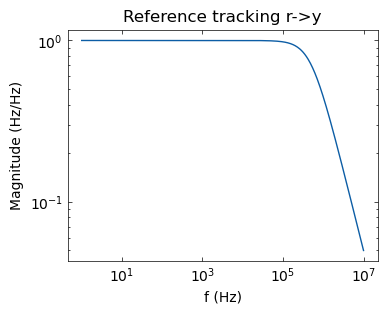

In [2]:
freq_points = 500
s = ct.tf('s')
sys = 10e6/(1 + s/(2*np.pi*1e5))
plant = ControlModule(freq_points = freq_points, sys_ref = sys, unit_in = 'V', unit_out = 'Hz')
plant.output_noise = np.ones(freq_points)*1e4

sys = 0.5e-6*(1 + 2*np.pi*1e5/s)
servo = ControlModule(freq_points = freq_points, sys_ref = sys, unit_in = 'Hz', unit_out = 'V')

C_list = [servo,plant]
laser = feedback_combine(C_list,1)
laser.input_noise = np.ones(freq_points)*1e2
laser.freqresp_module_update()

laser.plot_ref_tracking()

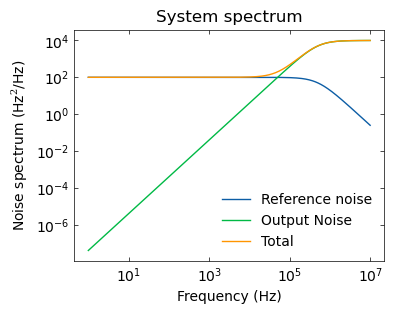

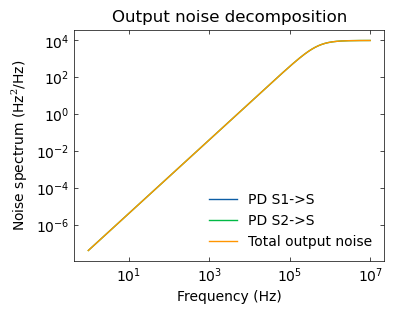

In [3]:
laser.plot_module_noise()